# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm, model_selection, metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Read the dataset

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


# 3. Split the dataset into X and y

In [5]:
X = df['status']
y = df['author']

# 4. Split the dataset into training set and testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [7]:
tfidf = TfidfVectorizer(max_features = 1000)
count = CountVectorizer(max_features = 1000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_train_count = count.fit_transform(X_train)

In [8]:
X_test_tfidf = tfidf.transform(X_test)
X_test_count = count.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
logreg_tfidf = LogisticRegression()
logreg_count = LogisticRegression()

logreg_tfidf.fit(X_train_tfidf, y_train)
logreg_count.fit(X_train_count, y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [10]:
svm_tfidf = SVC()
svm_count = SVC()

svm_tfidf.fit(X_train_tfidf, y_train)
svm_count.fit(X_train_count, y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [11]:
y_pred_logreg_tfidf = logreg_tfidf.predict(X_test_tfidf)
y_pred_logreg_count = logreg_count.predict(X_test_count)

y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)
y_pred_svm_count = svm_count.predict(X_test_count)

score_logreg_tfidf = accuracy_score(y_test, y_pred_logreg_tfidf)
score_logreg_count = accuracy_score(y_test, y_pred_logreg_count)

score_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
score_svm_count = accuracy_score(y_test, y_pred_svm_count)

In [12]:
print('Logistic Regression tfidf: ', score_logreg_tfidf)
print('Logistic Regression Count: ', score_logreg_count)
print('SVM tfidf: ', score_svm_tfidf)
print('SVM, CountVectorizer): ', score_svm_count)

Logistic Regression tfidf:  0.8333333333333334
Logistic Regression Count:  0.8833333333333333
SVM tfidf:  0.875
SVM, CountVectorizer):  0.8583333333333333


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [13]:
cm_logreg_tfidf = confusion_matrix(y_test, y_pred_logreg_tfidf)
cm_logreg_count = confusion_matrix(y_test, y_pred_logreg_count)
cm_svm_tfidf = confusion_matrix(y_test, y_pred_svm_tfidf)
cm_svm_count = confusion_matrix(y_test, y_pred_svm_count)

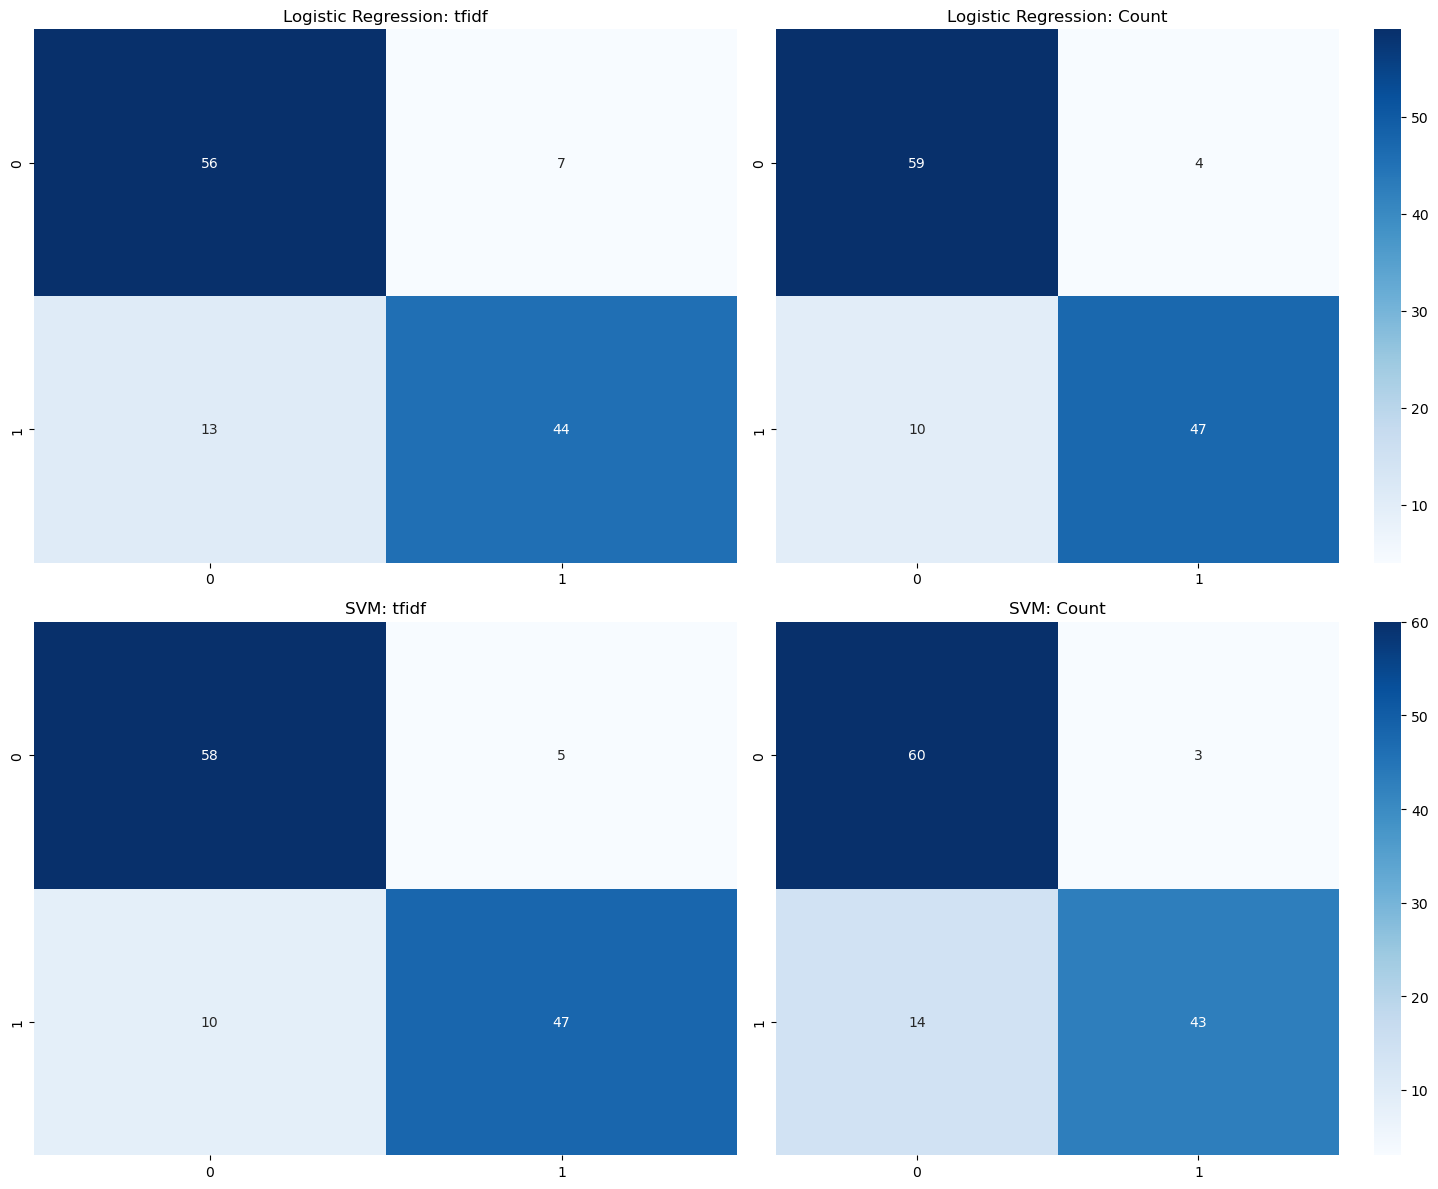

In [14]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(cm_logreg_tfidf, annot=True, cmap = 'Blues', cbar = False)
plt.title('Logistic Regression: tfidf')

plt.subplot(2, 2, 2)
sns.heatmap(cm_logreg_count, annot = True, cmap = 'Blues')
plt.title('Logistic Regression: Count')

plt.subplot(2, 2, 3)
sns.heatmap(cm_svm_tfidf, annot = True, cmap = 'Blues', cbar = False)
plt.title('SVM: tfidf')

plt.subplot(2, 2, 4)
sns.heatmap(cm_svm_count, annot = True, cmap = 'Blues')
plt.title('SVM: Count')

plt.tight_layout()
plt.show()